# Credit Card Fraud Detection using Tensorflow

## Import of Libaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df =  pd.read_csv('creditcard.csv')

## Quick EDA

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [7]:
df= df.drop('Time', axis =1)

## Scaling the Data

Due to imbalanced dataset we can reduce the split to train the model

In [8]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [9]:
non_fraud = non_fraud.sample(n = 1000)
non_fraud.shape

(1000, 30)

In [10]:
df = fraud.append(non_fraud)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model creatation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()
model.add(Dense(29,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=35)

In [18]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size= 128,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 1119 samples, validate on 373 samples
Epoch 1/600
1119/1119 [==============================] - 1s 1ms/sample - loss: 0.6752 - val_loss: 0.6490
Epoch 2/600
1119/1119 [==============================] - 0s 37us/sample - loss: 0.6600 - val_loss: 0.6387
Epoch 3/600
1119/1119 [==============================] - 0s 32us/sample - loss: 0.6451 - val_loss: 0.6234
Epoch 4/600
1119/1119 [==============================] - 0s 38us/sample - loss: 0.6435 - val_loss: 0.6139
Epoch 5/600
1119/1119 [==============================] - 0s 33us/sample - loss: 0.6296 - val_loss: 0.6064
Epoch 6/600
1119/1119 [==============================] - 0s 35us/sample - loss: 0.6321 - val_loss: 0.5975
Epoch 7/600
1119/1119 [==============================] - 0s 36us/sample - loss: 0.6115 - val_loss: 0.5894
Epoch 8/600
1119/1119 [==============================] - 0s 37us/sample - loss: 0.6063 - val_loss: 0.5672
Epoch 9/600
1119/1119 [==============================] - 0s 30us/sample - loss: 0.5860 - val_loss: 0.5407


Epoch 77/600
1119/1119 [==============================] - 0s 23us/sample - loss: 0.1830 - val_loss: 0.1428
Epoch 78/600
1119/1119 [==============================] - 0s 25us/sample - loss: 0.2124 - val_loss: 0.1428
Epoch 79/600
1119/1119 [==============================] - 0s 25us/sample - loss: 0.1970 - val_loss: 0.1413
Epoch 80/600
1119/1119 [==============================] - 0s 26us/sample - loss: 0.1959 - val_loss: 0.1420
Epoch 81/600
1119/1119 [==============================] - 0s 25us/sample - loss: 0.1956 - val_loss: 0.1420
Epoch 82/600
1119/1119 [==============================] - 0s 40us/sample - loss: 0.2181 - val_loss: 0.1410
Epoch 83/600
1119/1119 [==============================] - 0s 29us/sample - loss: 0.2018 - val_loss: 0.1406
Epoch 84/600
1119/1119 [==============================] - 0s 34us/sample - loss: 0.1960 - val_loss: 0.1375
Epoch 85/600
1119/1119 [==============================] - 0s 30us/sample - loss: 0.2230 - val_loss: 0.1394
Epoch 86/600
1119/1119 [=============

1119/1119 [==============================] - 0s 23us/sample - loss: 0.1758 - val_loss: 0.1372
Epoch 154/600
1119/1119 [==============================] - 0s 24us/sample - loss: 0.1804 - val_loss: 0.1395
Epoch 155/600
1119/1119 [==============================] - 0s 24us/sample - loss: 0.1721 - val_loss: 0.1347
Epoch 156/600
1119/1119 [==============================] - 0s 23us/sample - loss: 0.1941 - val_loss: 0.1338
Epoch 157/600
1119/1119 [==============================] - 0s 23us/sample - loss: 0.1720 - val_loss: 0.1374
Epoch 158/600
1119/1119 [==============================] - 0s 24us/sample - loss: 0.1875 - val_loss: 0.1355
Epoch 159/600
1119/1119 [==============================] - 0s 24us/sample - loss: 0.1737 - val_loss: 0.1334
Epoch 160/600
1119/1119 [==============================] - 0s 24us/sample - loss: 0.1790 - val_loss: 0.1331
Epoch 161/600
1119/1119 [==============================] - 0s 23us/sample - loss: 0.1955 - val_loss: 0.1339
Epoch 00161: early stopping


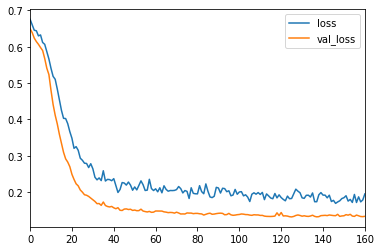

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Prediction and Evaluation

In [20]:
predictions = model.predict_classes(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.97      0.91      0.94       124

    accuracy                           0.96       373
   macro avg       0.96      0.95      0.95       373
weighted avg       0.96      0.96      0.96       373



In [22]:
print(confusion_matrix(y_test,predictions))

[[245   4]
 [ 11 113]]
